In [1]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [2]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)


In [3]:
folder_path = u'C:/Users/user/Desktop/AI-project/features/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [4]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 2}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Divide train/test

In [5]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
#train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [6]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [7]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [8]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

In [9]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [10]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [11]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [12]:
N_train = (y_train == 0).sum() 
S_train = (y_train == 1).sum() 
V_train = (y_train == 2).sum() 

N_test = (y_test == 0).sum() 
S_test = (y_test == 1).sum() 
V_test = (y_test == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
print("Total: ",N_train+V_train+S_train)

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")
print("Total: ",N_test+V_test+S_test)

Perc di N in train: 0.9240884203168686
Perc di S in train: 0.04832391658900279
Perc di V in train: 0.027587663094128613
Total:  137344
Perc di S in test: 0.9049530732924645
Perc di S in test: 0.03013616882764607
Perc di S in test: 0.06491075787988933
Total:  36866


# Outliers removal

In [13]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train_rem = X_train.copy()

feature_list = X_train_rem.columns
print('Missing values before outlier removal: ' + str(X_train_rem.isnull().sum().sum()))

# apply zscore
scaler = StandardScaler().fit(X_train_rem)
zscore_features = scaler.transform(X_train_rem)

# select all those values with zscore > -+ 3  as outliers
abs_zscores = np.abs(zscore_features)

outliers_detected = abs_zscores > 3
print('Outliers detected (train): ' + str(np.sum(np.sum(outliers_detected))))

# set outliers as missing values
X_train_rem[outliers_detected] = np.nan

print('Missing values after outlier removal (train): ' + str(X_train_rem.isnull().sum().sum()))

Missing values before outlier removal: 0
Outliers detected (train): 23320
Missing values after outlier removal (train): 23320


In [14]:
df=pd.concat([X_train_rem,y_train],axis=1)
df2=df[df.isna().any(axis=1)]

N_train = (df2['annotation'] == 0).sum() 
S_train = (df2['annotation'] == 1).sum() 
V_train = (df2['annotation'] == 2).sum() 
print(N_train)
print(S_train)
print(V_train)

11956
1137
570


In [15]:
df = df.dropna(axis=0)
print('Missing values (train): ' + str(df.isnull().sum().sum()))

Missing values (train): 0


In [16]:
X_train_rem = df.drop('annotation', axis=1)
y_train_rem = df['annotation']

In [17]:
N_train = (y_train_rem == 0).sum() 
S_train = (y_train_rem == 1).sum() 
V_train = (y_train_rem == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
print("Total: ",N_train+V_train+S_train)

Perc di N in train: 0.9295041275539493
Perc di S in train: 0.04446923941429969
Perc di V in train: 0.026026633031751036
Total:  123681


In [18]:
one_hot_encoded_df_rem = pd.get_dummies(y_train_rem, columns=['annotation'])

one_hot_encoded_array_train_rem = one_hot_encoded_df_rem.values

In [19]:
X_test_rem = X_test.copy()
zscore_features = scaler.transform(X_test_rem)
abs_zscores = np.abs(zscore_features)
outliers_detected = abs_zscores > 3
print('Outliers detected (validation): ' + str(np.sum(np.sum(outliers_detected))))


X_test_rem[outliers_detected] = np.nan

print('Missing values after outlier removal (validation): ' + str(X_test_rem.isnull().sum().sum()))

Outliers detected (validation): 3820
Missing values after outlier removal (validation): 3820


In [20]:
df=pd.concat([X_test_rem,y_test],axis=1)
df2=df[df.isna().any(axis=1)]

N_train = (df2['annotation'] == 0).sum() 
S_train = (df2['annotation'] == 1).sum() 
V_train = (df2['annotation'] == 2).sum() 
print(N_train)
print(S_train)
print(V_train)

2066
53
182


In [21]:
df = df.dropna(axis=0)
print('Missing values (test): ' + str(df.isnull().sum().sum()))

Missing values (test): 0


In [22]:
X_test_rem = df.drop('annotation', axis=1)
y_test_rem = df['annotation']

In [23]:
N_test = (y_test_rem == 0).sum() 
S_test = (y_test_rem == 1).sum() 
V_test = (y_test_rem == 2).sum() 

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")
print("Total: ",N_test+V_test+S_test)

Perc di S in test: 0.9054245624186316
Perc di S in test: 0.030608997540865036
Perc di S in test: 0.0639664400405034
Total:  34565


In [24]:
one_hot_encoded_df_test_rem = pd.get_dummies(y_test_rem, columns=['annotation'])

one_hot_encoded_array_test_rem = one_hot_encoded_df_test_rem.values

# Useful functions

In [25]:
# produce a normalized convulational matrix
def show_confusion_matrix(y_predi, model_name_pred):

    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    cm = confusion_matrix(test_classes, predicted_class)
    classes_name = ['N', 'S', 'V']
    
    
    #Normalized cm
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.title(model_name_pred)
    plt.show()

In [26]:
def downsample_majority_class(df, class_column):
    
    # Calculate the class counts
    class_counts = df[class_column].value_counts()
    
    print(class_counts)

    # Find the maximum value among the two least represented classes
    min_class_size = class_counts.nsmallest(2).min()

    subsampled_df = pd.DataFrame()

    for class_label in class_counts.index:
        class_subset = df[df[class_column] == class_label]

        # Downsample if this is the majority class
        if class_counts[class_label] > min_class_size:
            class_subset = class_subset.sample(n=min_class_size, random_state=42)
        
        subsampled_df = pd.concat([subsampled_df, class_subset], ignore_index=True)
        
    class_counts_sub = subsampled_df[class_column].value_counts()
    print(class_counts_sub)

    return subsampled_df

In [27]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def compute_metrics (y_predi):
    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    print("Balanced accuracy score: ", balanced_accuracy_score(test_classes, predicted_class))
    print("Accuracy score: ", accuracy_score(test_classes, predicted_class))
    print("F1 score: ", f1_score(test_classes, predicted_class,average='macro'))
    print("Precision score: ", precision_score(test_classes, predicted_class,average='macro'))
    print("Recall score: ", recall_score(test_classes, predicted_class,average='macro'))
    

In [28]:
from sklearn.model_selection import GridSearchCV
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'balanced_accuracy', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("Balanced accuracy: %f using %s" % (gs.best_score_, gs.best_params_))

In [29]:
def hyperp_search_d(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'balanced_accuracy', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_d, y_train_d)
    print("Balanced accuracy: %f using %s" % (gs.best_score_, gs.best_params_))

# Class weights

In [30]:
nN = np.count_nonzero(y_train_rem == 0)
nV = np.count_nonzero(y_train_rem == 1)
nS = np.count_nonzero(y_train_rem == 2)

class_sum = nN+nV+nS
wN = round(1-(nN/class_sum),2)
wV = round(1-(nV/class_sum),2)  
wS = round(1-(nS/class_sum),2)

class_freq_rem = {0: wN, 1: wV, 2: wS}

print(class_freq_rem)

{0: 0.07, 1: 0.96, 2: 0.97}


In [31]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=[0.,1.,2.], y=y_train_rem)

keys = np.arange(0,3,1)
class_weights_rem = dict(zip(keys, weights))
class_weights_rem

{0: 0.3586141507628608, 1: 7.495818181818182, 2: 12.807393600497049}

# Feature selection

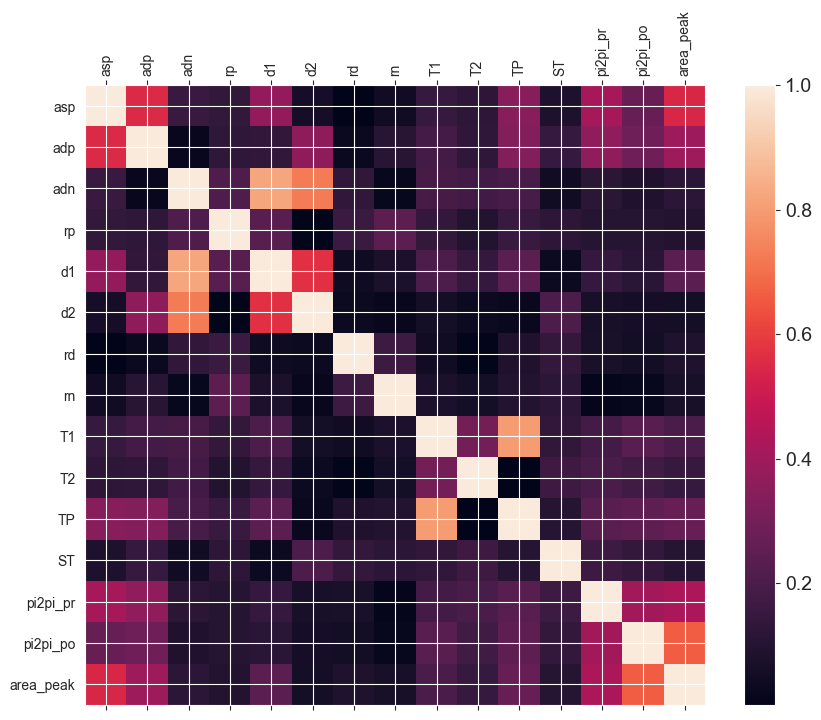

In [32]:

cor_matrix = X_train_rem.corr().abs()
feature_list = X_train_rem.columns
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


In [33]:

correlated_features = set()
correlation_matrix = X_train_rem.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            if median_corr[i] < median_corr[j]:
                colname = correlation_matrix.columns[i]
            else:
                colname = correlation_matrix.columns[j]
            correlated_features.add(colname)
X_train_rem.drop(labels=correlated_features, axis=1, inplace=True)
# see how it drops correlated / drop the one that had a lower correlation w.r to the other feat
print('Deleted features: ' + str(correlated_features))


Deleted features: {'d2', 'T1', 'adn'}


C:\Users\user\AppData\Local\Temp\ipykernel_27028\1716762707.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if median_corr[i] < median_corr[j]:


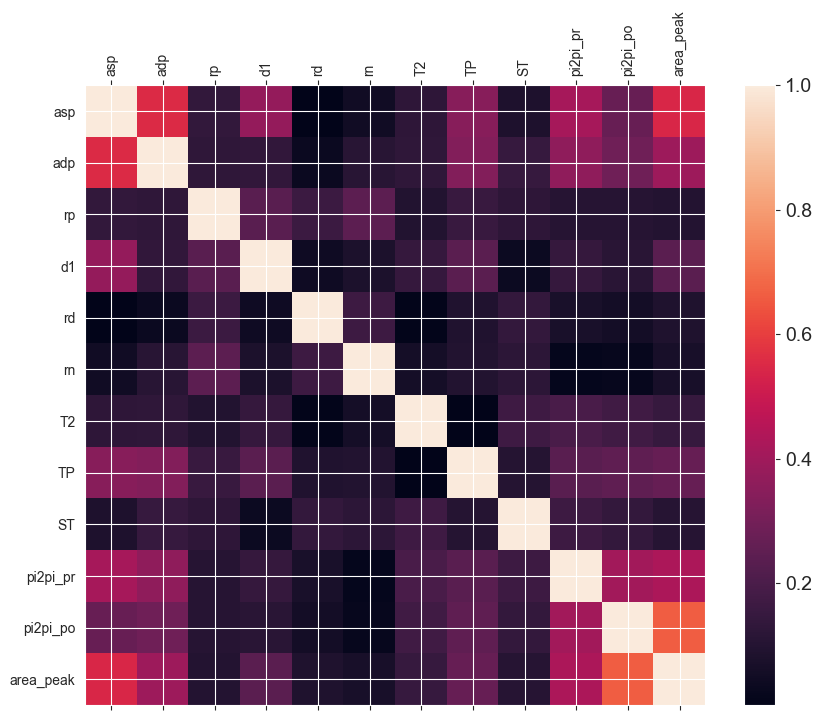

In [34]:

cor_matrix = X_train_rem.corr().abs()
feature_list = list(X_train_rem.columns)
f = plt.figure(figsize=(10, 8))
plt.matshow(cor_matrix, fignum=f.number)
plt.xticks(range(len(feature_list)), feature_list, fontsize=10, rotation=90)
plt.yticks(range(len(feature_list)), feature_list, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)


In [35]:

X_test_rem = X_test_rem[feature_list]
X_test_rem


,asp,adp,rp,d1,rd,rn,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak
7,0.167071,0.722429,0.881493,0.113784,0.077512,0.791480,0.119718,0.439024,0.321839,0.109312,0.051724,0.000000
8,0.163834,0.722429,0.881392,0.112276,0.077539,0.791525,0.119718,0.658537,0.362319,0.109312,0.051724,0.009166
9,0.164541,0.720765,0.881352,0.115078,0.077468,0.791280,0.140845,0.658537,0.362319,0.109312,0.051724,0.009406
10,0.162140,0.723079,0.881361,0.115887,0.077412,0.791119,0.140845,0.658537,0.362319,0.109312,0.050287,0.008756
11,0.161144,0.720975,0.881243,0.115638,0.077427,0.791107,0.140845,0.658537,0.362319,0.107962,0.050287,0.008581
...,...,...,...,...,...,...,...,...,...,...,...,...
36855,0.423386,0.688054,0.593188,0.365005,0.172871,0.811847,0.296296,0.766304,0.596913,0.146728,0.251201,0.089873
36856,0.411826,0.690599,0.593082,0.470037,0.187856,0.807681,0.248677,0.728261,0.615385,0.278916,0.104324,0.031890
36857,0.449836,0.744941,0.594719,0.351952,0.172973,0.812554,0.201058,0.760870,0.598930,0.137475,0.124914,0.090600
36859,0.464852,0.612352,0.592158,0.339432,0.173787,0.813046,0.275132,0.823370,0.582310,0.164574,0.096774,0.082554


# PCA

In [36]:
from sklearn.decomposition import PCA
varianceThreshold = 0.9
pca_features = PCA(n_components = varianceThreshold) # dimensionality reduction
pca_features.fit(X_train)

X_train_pca = pca_features.transform(X_train)
print(np.shape(X_train_pca))

X_test_pca = pca_features.transform(X_test)
print(np.shape(X_test_pca))

'\nfrom sklearn.decomposition import PCA\nvarianceThreshold = 0.9\npca_features = PCA(n_components = varianceThreshold) # dimensionality reduction\npca_features.fit(X_train)\n\nX_train = pca_features.transform(X_train)\nprint(np.shape(X_train))\n\nX_test = pca_features.transform(X_test)\nprint(np.shape(X_test))\n'

# Downsampled sets

In [37]:
train = pd.concat([X_train,y_train],axis=1)
train

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055880,0.801983,0.799544,0.681870,0.070597,0.433180,0.458742,0.485321,0.018545,0.212121,0.941617,0.775000,0.000000,0.065539,0.003993,0
1,0.057403,0.803716,0.801356,0.682360,0.070312,0.432627,0.458752,0.485533,0.017118,0.202020,0.941617,0.775000,0.102538,0.067653,0.004384,0
2,0.057984,0.802885,0.800347,0.682358,0.071546,0.432986,0.458729,0.485352,0.019971,0.232323,0.943114,0.772414,0.104569,0.065539,0.004580,0
3,0.057484,0.803932,0.800936,0.682399,0.070705,0.432987,0.458743,0.485465,0.018545,0.212121,0.941617,0.775000,0.102538,0.068710,0.004438,0
4,0.057938,0.802728,0.801323,0.682332,0.070741,0.432279,0.458749,0.485501,0.018545,0.222222,0.943114,0.772414,0.105584,0.064482,0.004605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137339,0.049199,0.836044,0.187404,0.199390,0.808075,1.000000,0.572823,0.890823,0.377079,1.000000,0.665098,0.935655,0.019520,0.015022,0.000000,0
137340,0.046219,0.836044,0.187404,0.199143,0.806709,1.000000,0.572820,0.887826,0.292135,1.000000,0.745937,0.934561,0.019624,0.014918,0.000000,0
137341,0.036760,0.836044,0.187404,0.197617,0.802374,1.000000,0.572812,0.869294,0.207640,1.000000,0.826347,0.930344,0.019520,0.035990,0.000000,0
137342,0.266708,0.836044,0.187404,0.201062,0.907759,1.000000,0.573021,0.911134,0.032360,1.000000,0.993157,0.941120,0.040494,0.137492,0.282995,0


In [38]:
train_df = downsample_majority_class(train,'annotation')

# Creating training and testing sets
X_train_d = train_df.drop(['annotation'], axis=1)
y_train_d = train_df['annotation']

annotation
0    126918
1      6637
2      3789
Name: count, dtype: int64
annotation
0    3789
1    3789
2    3789
Name: count, dtype: int64


In [39]:
train = pd.concat([X_train_rem,y_train_rem],axis=1)
train

,asp,adp,rp,d1,rd,rn,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055880,0.801983,0.681870,0.070597,0.458742,0.485321,0.212121,0.941617,0.775000,0.000000,0.065539,0.003993,0
1,0.057403,0.803716,0.682360,0.070312,0.458752,0.485533,0.202020,0.941617,0.775000,0.102538,0.067653,0.004384,0
2,0.057984,0.802885,0.682358,0.071546,0.458729,0.485352,0.232323,0.943114,0.772414,0.104569,0.065539,0.004580,0
3,0.057484,0.803932,0.682399,0.070705,0.458743,0.485465,0.212121,0.941617,0.775000,0.102538,0.068710,0.004438,0
4,0.057938,0.802728,0.682332,0.070741,0.458749,0.485501,0.222222,0.943114,0.772414,0.105584,0.064482,0.004605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137334,0.053171,0.845806,0.200235,0.262828,0.569021,0.913441,0.277778,0.910180,0.951923,0.023051,0.010119,0.001117,0
137335,0.031052,0.848027,0.197720,0.243748,0.571959,0.914476,0.076389,0.818648,0.931208,0.014744,0.017004,0.000000,1
137336,0.039120,0.848027,0.199565,0.247445,0.571680,0.913978,0.076389,0.907613,0.953390,0.021597,0.018882,0.000678,0
137337,0.048010,0.845696,0.200011,0.254489,0.571065,0.913682,0.142361,0.903764,0.956250,0.023466,0.012936,0.001007,0


In [40]:
train_df = downsample_majority_class(train,'annotation')

# Creating training and testing sets
X_train_rem_d = train_df.drop(['annotation'], axis=1)
y_train_rem_d = train_df['annotation']

annotation
0    114962
1      5500
2      3219
Name: count, dtype: int64
annotation
0    3219
1    3219
2    3219
Name: count, dtype: int64


# Models

# K-NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(5,60,5)}

hyperp_search_d(classifier,parameters)

Balanced accuracy: 0.580892 using {'n_neighbors': 5}


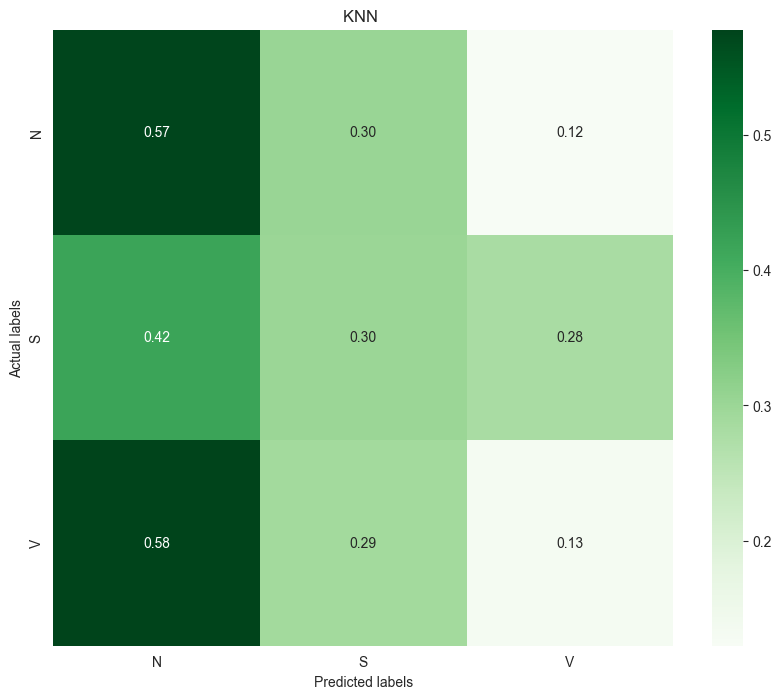

Balanced accuracy score:  0.33578255607701313
Accuracy score:  0.5376769923506755
F1 score:  0.28286113587630574
Precision score:  0.33639718906635757
Recall score:  0.33578255607701313


In [42]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_d, y_train_d)

y_pred_knn = neigh.predict(X_test)
    
one_hot_encoded_pred_knn = pd.get_dummies(y_pred_knn, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_knn, "KNN ")
compute_metrics(one_hot_encoded_pred_knn)

# SVM

In [43]:
from sklearn.svm import SVC  
classifier = SVC()
parameters = {"kernel":['linear','rbf'], 
              "C":[0.001,0.01,0.1],
              "gamma":[0.1,1]}
hyperp_search_d(classifier,parameters)

Balanced accuracy: 0.496877 using {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


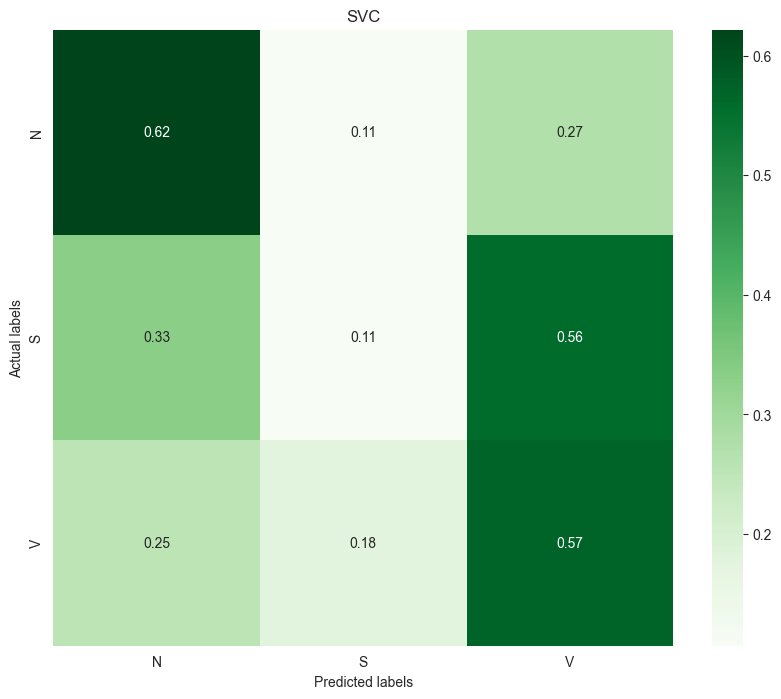

Balanced accuracy score:  0.4331940224474378
Accuracy score:  0.6027505018173928
F1 score:  0.3339927401419738
Precision score:  0.3692166649971005
Recall score:  0.4331940224474378


In [44]:
clfSVC = SVC(kernel='rbf',
             C=0.1,
             gamma=0.1,
             class_weight=None) 
 
# fitting x samples and y classes 
clfSVC.fit(X_train_d, y_train_d)

y_pred_SVC = clfSVC.predict(X_test)
    
one_hot_encoded_pred_SVC = pd.get_dummies(y_pred_SVC, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_SVC, "SVC")
compute_metrics(one_hot_encoded_pred_SVC)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
parameters = { 
    'n_estimators': np.arange(20,100,10),
    'max_depth' : [10, 15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : np.arange(20,40,2),
}
hyperp_search_d(classifier,parameters)

Balanced accuracy: 0.598663 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 20, 'n_estimators': 90}


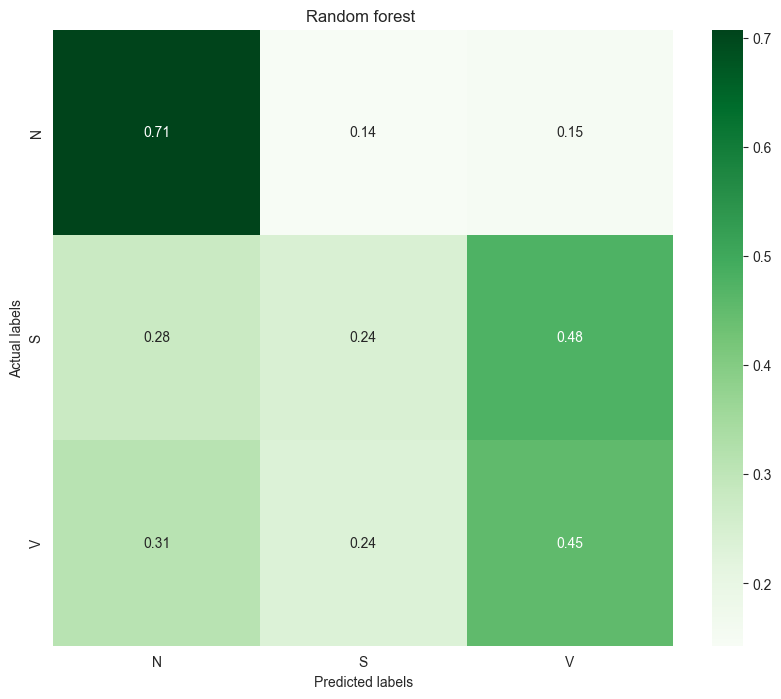

Balanced accuracy score:  0.46795201907502637
Accuracy score:  0.6768567243530624
F1 score:  0.3782858467395649
Precision score:  0.38979860366257707
Recall score:  0.46795201907502637


In [46]:
randomForestModel = RandomForestClassifier(n_estimators=90,
                                            criterion='entropy',
                                            max_depth=15,
                                            min_samples_split=20,
                                            class_weight=None,
                                            )
    
    
randomForestModel.fit(X_train_d, y_train_d)
y_pred_RF = randomForestModel.predict(X_test)
    
one_hot_encoded_pred_RF = pd.get_dummies(y_pred_RF, columns=['0'])
show_confusion_matrix(one_hot_encoded_pred_RF, "Random forest ")
compute_metrics(one_hot_encoded_pred_RF)

# Balanced random forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
classifier=BalancedRandomForestClassifier()
parameters = { 
    'n_estimators': np.arange(30,70,10),
    'max_depth' : [10, 15],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : np.arange(20,40,10),
    "max_features":[None],
    "sampling_strategy":['not minority','majority','all'],
    "random_state":[100],
}
hyperp_search(classifier,parameters)

In [ ]:

BalancedRandomForestModel = BalancedRandomForestClassifier(n_estimators= 50,
                                                   criterion= 'entropy',
                                                   max_depth= 50,
                                                   min_samples_split= 30,
                                                   min_samples_leaf = 1,
                                                   min_weight_fraction_leaf = 0.0,
                                                   max_features= None,
                                                   sampling_strategy='not minority',
                                                   replacement= False,
                                                   n_jobs= -1,
                                                   random_state=100,
                                                   class_weight= None,
                                                
                                                   bootstrap=True
                                                   )
BalancedRandomForestModel.fit(X_train, y_train)
y_pred_BRF = BalancedRandomForestModel.predict_proba(X_test)
one_hot_encoded_pred_BRF = pd.get_dummies(np.argmax(y_pred_BRF,axis=1))

show_confusion_matrix(one_hot_encoded_pred_BRF, "Random forest balanced")
compute_metrics(one_hot_encoded_pred_BRF)

# AdaBoost

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
classifier = EasyEnsembleClassifier()
parameters = { 
    'n_estimators': np.arange(30,70,10),
    "sampling_strategy":['not minority','majority','all'],
    "random_state":[42],
}
hyperp_search(classifier,parameters)

In [ ]:
modelEasyEns = EasyEnsembleClassifier(n_estimators=50, 
                                      random_state=42,
                                      sampling_strategy='not minority'
                                      )
modelEasyEns.fit(X_train, y_train)

y_predEasyEns = modelEasyEns.predict(X_test)
one_hot_encoded_pred_ens = pd.get_dummies(y_predEasyEns, columns=['0'])

show_confusion_matrix(one_hot_encoded_pred_ens, "EasyEnsembleClassifier")
compute_metrics(one_hot_encoded_pred_ens)

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(7,5,3,2),(7,5,3),(10, 5)], 
              "max_iter": [500,1000], 
              "alpha": [0.001,0.1,1]}
hyperp_search_d(classifier,parameters)

In [ ]:
# Neural Network
mlpc = MLPClassifier(hidden_layer_sizes=(7,5,3), 
                            max_iter=1000, 
                            alpha=0.001,
                            random_state=100)
mlpc.fit(X_train_d, y_train_d)

y_predmlpc = mlpc.predict(X_test)
one_hot_encoded_pred_mlpc = pd.get_dummies(y_predmlpc, columns=['0'])

show_confusion_matrix(one_hot_encoded_pred_mlpc, "Neural Network")
compute_metrics(one_hot_encoded_pred_mlpc)



# Confidence of Predictions

In [ ]:
# Balanced Random Forest
max_pred = np.argmax(y_pred_BRF,axis=1)
classes=pd.DataFrame(data=max_pred,columns=['Predicted class'])
label_remapping = {0:'N', 1: 'S', 2: 'V'}
classes['Predicted class']=classes['Predicted class'].replace(label_remapping)

prob=pd.DataFrame(data=np.take_along_axis(y_pred_BRF, np.expand_dims(max_pred, axis=-1), axis=-1),columns=['Confidence'])
conf=pd.concat([classes,prob],axis=1)
conf